<font size="8" face="algerian" color="#D23C22">Automobile Sales Analysis</font>


👋 Welcome to the documentation of my analysis on car sales data. In this repository, I delve into the intricacies of car sales transactions💰 to gain insights into various aspects of the business operations. My analysis aims to answer several key questions that are crucial for understanding the performance of our sales, identifying areas for improvement, and making informed business decisions📈. 

I performed an EDA on the data and created a tableau dashboard for easy and fast communication of findings.

### Libraries needed

In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.image as mpimg

%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

### Load the dataset and clean it

In [ ]:
df = pd.read_csv(r'C:\Users\mkhov\Desktop\Jupyter_Notebooks\Python_Github_projects\Automobile_Sales_Analysis_Project\csv_files\Auto_Sales_data.csv')

In [ ]:
# We create a new feature 'DATE_SINCE_LASTORDER' based on the 'ORDERDATE' and the 'DAYS_SINCE_LASTORDER'

df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
df['DATE_SINCE_LASTORDER'] = df['ORDERDATE'] - pd.to_timedelta(df['DAYS_SINCE_LASTORDER'], unit='D')

# View sample of the data
df.head()

In [ ]:
# Dimension of the data
df.shape

In [ ]:
# Check for NA values (Not Available)
df.isna().sum()

In [ ]:
# Check for duplicates
print(f'Sum of duplicated entries: {df.duplicated().sum()}')


In [ ]:
# Count the uniques values in each column
df.nunique()

In [ ]:
# Information on the data
df.info()

<font size="5" face="times new roman" color="dark green">Insights</font><br></br>
<p><font size="3" face="times new roman">
1. The dataset contains 2,747 entries and 20 columns<br>
2. The count of NAs (missing values) was 0, hence no missing values<br>
3. The key columns of the date set in based on sales transactions,customer information, product details and order status.<br>
4. Data types vary accros datetime, int, float and objects.  
</font></p>

<font size="8" face="times new roman" color="#D23C22"><b>EXPLORATION DATA ANALYSIS</font>

### Numerical Variables

In [ ]:
# We remove the ordernumber since it's IDs every transaction uniquely, 
# We will remove it for the EDA and Visualization

df_numeric = df.select_dtypes(include = ['int','float']).drop('ORDERNUMBER', axis=1)

# Showing the columns
df_numeric.columns

### Categorical Variables

In [ ]:
# The contact information isn't needed here

df_categorical = df.select_dtypes(include = ['datetime','object']).drop(
    ['CONTACTFIRSTNAME', 'PHONE','ADDRESSLINE1','CONTACTLASTNAME'],axis=1)

# Showing the columns
df_categorical.columns

<font size="8" face="times new roman" color="#D23C22"><b>Descriptive Analysis</b></font>

In [ ]:
# Numerical Features

round(df_numeric.describe(),2).transpose()

In [ ]:
# Categorical Features

round(df_categorical.select_dtypes(include = ['object']).describe()).transpose()

<font size="5" face="times new roman" color="yellow">Insights</font>🔍.


### Numerical Summary

1. **QUANTITYORDERED**: 
   - The average quantity ordered is approximately 35 units, with a standard deviation of around 9.76 units.
   - Orders typically range from 6 to 97 units, with 50% of orders falling between 27 and 43 units.

2. **PRICEEACH**:
   - The average price per item is about $101.10, with a standard deviation of approximately $42.04.
   - Prices range from $26.88 to $252.87, with half of the prices between $68.74 and $127.10.

3. **ORDERLINENUMBER**:
   - On average, orders consist of around 6.49 items, with a standard deviation of about 4.23.
   - The order line numbers range from 1 to 18, with 50% of orders having between 3 and 9 line items.

4. **SALES**:
   - The average sales amount is $3,553.05, with a standard deviation of $1,838.95.
   - Sales values vary from $482.13 to $14,082.80, with half of the sales falling between $2,204.35 and $4,503.09.

5. **DAYS_SINCE_LASTORDER**:
   - On average, the time since the last order is approximately 1,757.09 days, with a standard deviation of around 819.28 days.
   - The duration since the last order ranges from 42 to 3,562 days, with half of the orders occurring within 1,077 to 2,436 days.

6. **MSRP**:
   - The Manufacturer's Suggested Retail Price (MSRP) has an average value of $100.69, with a standard deviation of $40.11.
   - MSRP values range from $33.00 to $214.00, with 50% of the MSRP falling between $68.00 and $124.00.

### Categorical Summary

1. **STATUS**:
   - There are 6 unique statuses.
   - The most common status is "Shipped", appearing 2541 times.

2. **PRODUCTLINE**:
   - There are 7 unique product lines.
   - The most common product line is "Classic Cars", appearing 949 times.

3. **PRODUCTCODE**:
   - There are 109 unique product codes.
   - The most frequent product code is "S18_3232", occurring 51 times.

4. **CUSTOMERNAME**:
   - There are 89 unique customer names.
   - The most common customer name is "Euro Shopping Channel", appearing 259 times.

5. **CITY**:
   - There are 71 unique cities.
   - The most common city is "Madrid", appearing 304 times.

6. **POSTALCODE**:
   - There are 73 unique postal codes.
   - The most frequent postal code is "28034", occurring 259 times.

7. **COUNTRY**:
   - There are 19 unique countries.
   - The most common country is "USA", appearing 928 times.

8. **DEALSIZE**:
   - There are 3 unique deal sizes.
   - The most common deal size is "Medium", appearing 1349 times.

<font size="8" face="times new roman" color="#D23C22"><b>UNIVARITE ANALYSIS</font>


### Numerical Variables

In [ ]:
# Create a function to display the charts
color_palette = ["#ec1313",'darkgreen','#76C0EE']  

def univariateAnalysis_numeric(column, nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))    
    
    # Plot histogram
    sns.histplot(df[column], bins=nbins, ax=axes[0], stat= 'density')
    axes[0].set_title("Histogram of " + column)
    
    # Overlay the KDE plot separately with its own color
    sns.kdeplot(data=df[column], ax=axes[0], color=color_palette[0], linewidth=2)
   
    
    # Plot Boxplot plot
    sns.violinplot(x=df[column], ax=axes[1], color=color_palette[2])
    axes[1].set_title("Boxlot of " + column )
    
    sns.despine()
    plt.show()
for x in df_numeric:
    univariateAnalysis_numeric(x,20)

### Categorical Variables

In [ ]:

cat_columns = df[['STATUS', 'PRODUCTLINE', 'DEALSIZE']]
def univariateAnalysis_category(cols):
    
    print("Distribution of", cols)
    print("_"* 60)
    color = ['#08254A', '#F87085', '#337818', '#400D44', '#E8784F']
    value_counts = cat_columns[cols].value_counts()
    
    # Count plot
    fig, axes = plt.subplots(figsize = (10,5))
    
    axes.bar(data=value_counts,x=value_counts.index, height=value_counts.values, color = color)
    #fig.update_layout(width=700, plot_bgcolor='#ffffff', paper_bgcolor='#ffffff')
    
    plt.show()
    print('')
    
    
for x in cat_columns:
    univariateAnalysis_category(x)


In [ ]:
from IPython.display import Image

# Top 10 Countries contribution
top_10_country = df['COUNTRY'].value_counts().head(10)

# Creating the funnel chart
fig = go.Figure(go.Funnel(x = top_10_country.values, y = top_10_country.index,
                           marker = {'color':px.colors.sequential.BuGn_r}))
fig.update_layout(title = 'Top 10 Country Distribution', template = 'plotly_white')


fig
# fig.write_image("top_country.png", width=800, height=500,scale = 1)

# Display the saved high-quality image in the notebook
# Image("top_country.png")

In [ ]:
# Top 10 Cities contribution
top_10_city = df['CITY'].value_counts().head(10)

# Creating the funnel chart
fig = go.Figure( go.Funnel(x = top_10_city.values, y = top_10_city.index,
                           marker = {'color':px.colors.sequential.BuGn_r}))
fig.update_layout(title = 'Top 10 City Distribution', template = 'plotly_white')

fig.show()



In [ ]:
# Top 10 Customers contribution
top_10_customer = df['CUSTOMERNAME'].value_counts().head(10)

# Creating the funnel chart
fig = go.Figure( go.Funnel(x = top_10_customer.values, y = top_10_customer.index,
                           marker = {'color':px.colors.sequential.BuGn_r}))
fig.update_layout(title = 'Top 10 Customer Distribution', template = 'plotly_white')

fig.show()



<font size="8" face="times new roman" color="#D23C22"><b>BIVARITE ANALYSIS</font>


In [ ]:
df[df['STATUS'] == 'Disputed']

In [ ]:
# Finding the correlation between the numerical values
correlation = df_numeric.corr()
sns.heatmap(correlation,annot=True, linewidths=0.5, mask = np.triu(np.ones_like(correlation)))
plt.title('Correlation between the numerical variables', loc = 'left')

plt.show()


In [ ]:
# Correlation between Price and Sales

plt.figure(figsize=(10,5))
sns.lmplot(data = df, x = 'PRICEEACH', y = 'SALES', scatter_kws={'color':'blue'},
            line_kws={'color':'red'})
plt.title('Correlation between Price and Sales', loc = 'left')


<font size = '5' face = 'times new roman' color = 'blue' >Correlation Insights</font>

1. **QUANTITYORDERED vs. Sales**:
   - Positive correlation with SALES (0.553): Indicates that higher quantities ordered from customers are associated with higher sales for the company.(Which is always true).
   - Weak negative correlation with DAYS_SINCE_LASTORDER (-0.022): Indicates a very weak inverse relationship between quantity ordered and the number of days since the last order.

2. **PRICEEACH vs. Sales and orderlinenumber**:
   - Strong positive correlation with SALES (0.808): Indicates that the higher prices of each car the higher the sales generated by the company.
   - Weak negative correlation with ORDERLINENUMBER (-0.053): This means when the prices of cars increases it does not affect the order line number that much.

4. **DAYS_SINCE_LASTORDER vs. QUANTITYORDERED**:
   - Weak negative correlation with QUANTITYORDERED (-0.022): Indicates a very weak inverse relationship between the number of days since the last order and quantities ordered. This means the customers return to buy cars but in smaller quantities often.

5. **MSRP vs. PRICEEACH**:
   - Strong positive correlation with PRICEEACH (0.778) and SALES (0.635): Indicates that higher manufacturer's suggested retail prices are strongly associated with higher price each and moderately associated with higher sales.

In [ ]:
# Sales VS DealSize
plt.figure(figsize=(8,5))
df['SALES_K'] = df['SALES']/1000

sns.barplot(data = df, x = 'DEALSIZE', y = 'SALES_K', palette='magma', ci  = None, estimator=sum)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}K', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='bottom', fontsize=8)
plt.title('Sales by DealSize', loc = 'left')

In [ ]:
# Sales vs Productline
df_1 = pd.DataFrame(df.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending = False))
df_1['SALES_K'] = df_1["SALES"]/1000

plt.figure(figsize=(10,5))

sns.barplot(data = df_1, x = 'PRODUCTLINE', y = 'SALES_K', palette='magma', ci = None)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}k', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='bottom', fontsize=8)

plt.title('Sales by ProductLine', loc = 'left')

In [ ]:
# Sales vs country
top_10_country_sales = df.groupby('COUNTRY').agg({'SALES':'sum'}).sort_values(by = 'SALES', ascending=False).head(10)
top_10_country_sales['SALES_in_K'] = top_10_country_sales['SALES']/1000
plt.figure(figsize=(10,5))

sns.barplot(data = top_10_country_sales, x = 'COUNTRY', y = 'SALES_in_K', palette='magma', ci = None)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}k', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='bottom', fontsize=8)

plt.title('Sales by Country', loc = 'left')
plt.ylabel('Sales in thousand')

In [ ]:
# Sales vs city
top_10_city_sales = df.groupby('CITY').agg({'SALES':'sum'}).sort_values(by = 'SALES', ascending=False).head(10)
top_10_city_sales['SALES_in_K'] = top_10_city_sales['SALES']/1000
plt.figure(figsize=(10,5))

sns.barplot(data = top_10_city_sales, x = 'CITY', y = 'SALES_in_K', palette='magma', ci = None)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}k', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='bottom', fontsize=8)

plt.title('Sales by City', loc = 'left')
plt.ylabel('Sales in thousand')

In [ ]:

# Sales vs customer
top_10_customer_sales = df.groupby('CUSTOMERNAME').agg({'SALES':'sum'}).sort_values(by = 'SALES', ascending=False).head(10)
top_10_customer_sales['SALES_in_K'] = top_10_customer_sales['SALES']/1000
plt.figure(figsize=(24,7))

sns.barplot(data = top_10_customer_sales, x = 'CUSTOMERNAME', y = 'SALES_in_K', palette='magma', ci = None)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}k', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='bottom', fontsize=18)

plt.title('Sales by Customer', loc = 'left')
plt.ylabel('Sales in thousand')

<font size = '5' face = 'times new roman'  color = 'green'><b>Yearly, Quarterly, Monthly and Weekely Sales Trend</b></font>

In [ ]:
# Extract our Year, Quarters, Months and Weeks
df['Year'] = df['ORDERDATE'].dt.year
df['Month'] = df['ORDERDATE'].dt.month
df['Quaters'] = df['ORDERDATE'].dt.quarter
df['Week'] = df['ORDERDATE'].dt.isocalendar().week

In [ ]:
# Yearly Sales
plt.figure(figsize=(20,5))
sns.set_theme(style='whitegrid')
col = ['#2E27B7','#F80D0F','#26F801']

sns.lineplot(data = df, x = 'ORDERDATE', y = 'SALES', hue = 'Year', ci = None, palette = col)

plt.title('Yearly Sales', loc = 'left')

In [ ]:
# Quarterly Sales
plt.figure(figsize=(20,5))
sns.set_theme(style='whitegrid')
col = ['#2E27B7','#F80D0F','#26F801']

sns.lineplot(data = df, x = 'Quaters', y = 'SALES', hue = 'Year', ci = None,palette=col)
plt.title('Quater Sales', loc = 'left')

In [ ]:
# Monthly Sales

plt.figure(figsize=(20,5))
sns.set_theme(style='whitegrid')
col = ['#2E27B7','#F80D0F','#26F801']

sns.lineplot(data = df, x = 'Month', y = 'SALES', hue = 'Year', ci = None,palette=col)
plt.title('Monthly Sales', loc = 'left')


In [ ]:
# Weekly Sales
plt.figure(figsize=(20,5))
sns.set_theme(style='whitegrid')
col = ['#2E27B7','#F80D0F','#26F801']

sns.lineplot(data = df, x = 'Week', y = 'SALES', hue = 'Year', ci = None,palette=col)
plt.title('Weekly Sales', loc = 'left')

<font size = 8 face = 'times new roman' color = 'D23C22'><b>MULTIVARIATE ANALYSIS</b></font>

In [ ]:
# Comparison of Sales by Productline broken down by Dealsize
df1 = pd.DataFrame(df.filter(items=['PRODUCTLINE','SALES','DEALSIZE']).groupby(['PRODUCTLINE','DEALSIZE'])['SALES'].sum()).sort_values(by = 'SALES',ascending=False)
sns.set_theme(style = 'white')
plt.figure(figsize = (15,5))

sns.barplot(data = df1, x = 'PRODUCTLINE', y = 'SALES', hue = 'DEALSIZE', ci = None, palette='colorblind',
            estimator=sum)
plt.legend(title = 'Deal Size',bbox_to_anchor = (1,1))
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='bottom', fontsize=8)

plt.title('Sales by ProductLine', loc = 'left')


In [ ]:
# Comparison of QuantityOrdered by Productline with hue as Dealsize
df2 = pd.DataFrame(df.filter(items=['PRODUCTLINE','QUANTITYORDERED','DEALSIZE']).groupby(['PRODUCTLINE','DEALSIZE'])['QUANTITYORDERED'].sum()).sort_values(by = 'QUANTITYORDERED',ascending=False)

sns.set_theme(style='white')
plt.figure(figsize= (15,5))

sns.barplot(data = df2, x = 'PRODUCTLINE', y = 'QUANTITYORDERED', hue = 'DEALSIZE', ci = None, palette='colorblind')
plt.legend(title = 'Deal Size',loc = 'upper left',bbox_to_anchor = (1,1))

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='bottom', fontsize=8)
    
plt.title('Quantity Ordered by ProductLine', loc = 'left')

In [ ]:
# Comparison of Sales by Productline with hue as Year
df3 = pd.DataFrame(df.filter(items=['PRODUCTLINE','SALES','Year']).groupby(['PRODUCTLINE','Year'])['SALES'].sum()).sort_values(by = 'SALES',ascending=False)
df3['SALES_K'] = df3['SALES']/1000
sns.set_theme(style='white')
plt.figure(figsize= (15,5))

sns.barplot(data = df3, x = 'PRODUCTLINE', y = 'SALES_K', hue = 'Year', ci = None, palette='colorblind')
plt.legend(title = 'Year',loc = 'upper left',bbox_to_anchor = (1,1))
plt.title('Yearly Sales of Productline', loc = 'left')

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}k', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='bottom', fontsize=8)
    


In [ ]:
# Comparison of Sales by Country with hue as Year
top_10_country_sales1 = df.groupby(['COUNTRY','Year']).agg({'SALES':'sum'}).sort_values(by = 'SALES', ascending=False).head(10)
top_10_country_sales1['SALES_in_K'] = top_10_country_sales1['SALES']/1000

sns.set_theme(style='white')
plt.figure(figsize= (15,5))

sns.barplot(data = top_10_country_sales1, x = 'COUNTRY', y = 'SALES_in_K',hue = 'Year', ci = None, palette='colorblind')
plt.legend(title = 'Year',loc = 'upper left',bbox_to_anchor = (1,1))
plt.title('Year Salesly by Country', loc = 'left')

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}K', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='bottom', fontsize=8)

In [ ]:
# Comparison of Sales by Cities with hue as Year
top_10_city_sales1 = df.groupby(['CITY','Year']).agg({'SALES':'sum'}).sort_values(by = 'SALES', ascending=False).head(10)
top_10_city_sales1['SALES_in_K'] = top_10_city_sales1['SALES']/1000

sns.set_theme(style='white')
plt.figure(figsize= (15,5))

sns.barplot(data = top_10_city_sales1, x = 'CITY', y = 'SALES_in_K',hue = 'Year', ci = None, palette='colorblind')
plt.legend(title = 'Year',loc = 'upper left',bbox_to_anchor = (1,1))
plt.title('Year Sales by Cities', loc = 'left')

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}K', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='bottom', fontsize=8)

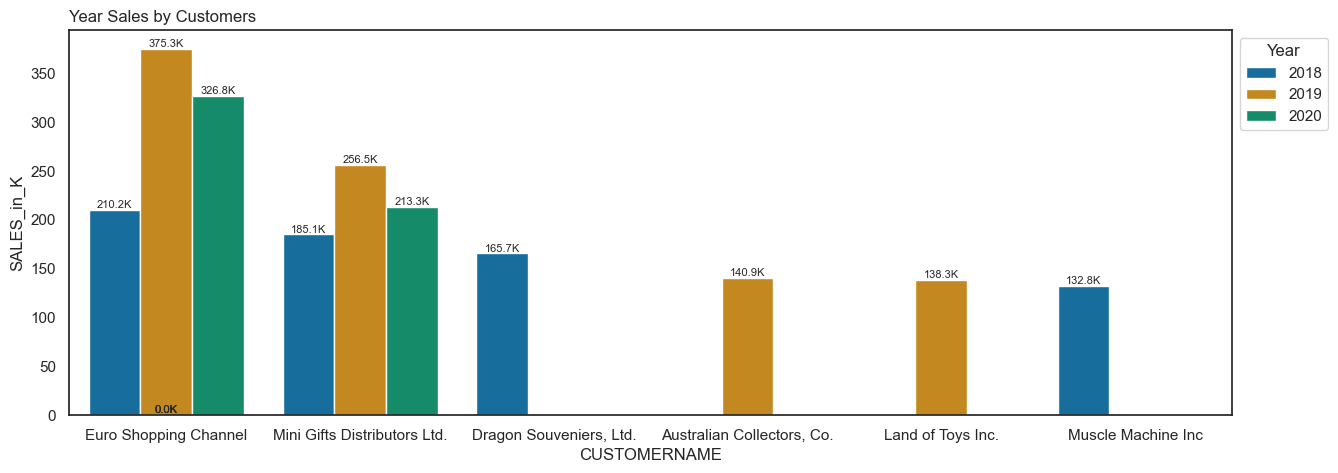

In [127]:
# Comparison of Sales by Customer with hue as Year
top_10_customer_sales1 = df.groupby(['CUSTOMERNAME','Year']).agg({'SALES':'sum'}).sort_values(by = 'SALES', ascending=False).head(10)
top_10_customer_sales1['SALES_in_K'] = top_10_customer_sales1['SALES']/1000

sns.set_theme(style='white')
plt.figure(figsize= (15,5))

sns.barplot(data = top_10_customer_sales1, x = 'CUSTOMERNAME', y = 'SALES_in_K',hue = 'Year', ci = None, palette='colorblind')
plt.legend(title = 'Year',loc = 'upper left',bbox_to_anchor = (1,1))
plt.title('Year Sales by Customers', loc = 'left')

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}K', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='bottom', fontsize=8)

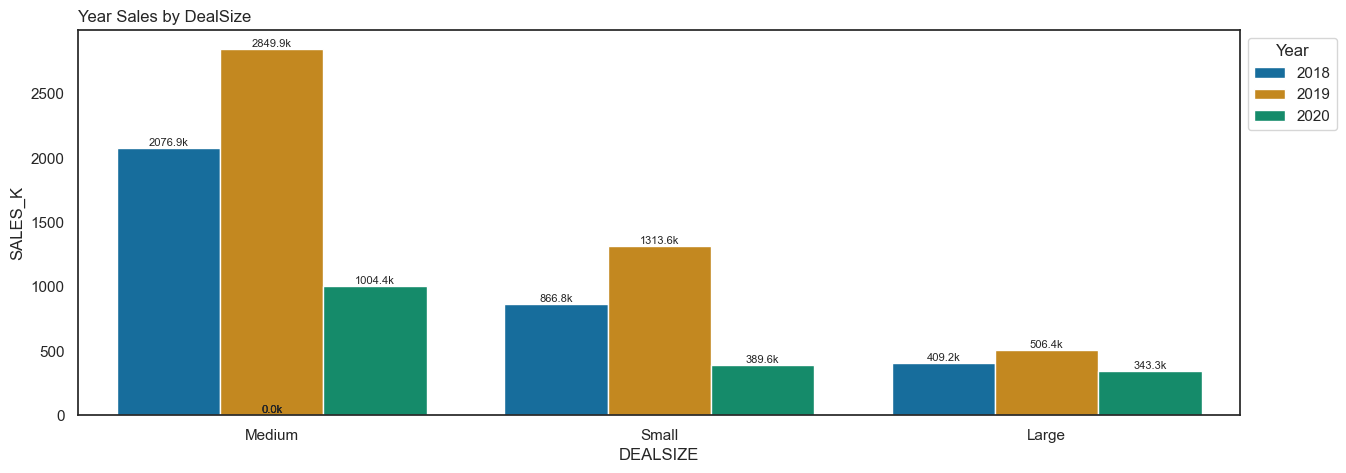

In [137]:
# Comparison of Sales by DealSize with hue as Year
df4 = pd.DataFrame(df.filter(items=['DEALSIZE','SALES','Year']).groupby(['DEALSIZE','Year'])['SALES'].sum()).sort_values(by = 'SALES',ascending=False)
df4['SALES_K'] = df4['SALES']/1000

sns.set_theme(style='white')
plt.figure(figsize= (15,5))

sns.barplot(data = df4, x = 'DEALSIZE', y = 'SALES_K', hue = 'Year', ci = None, palette='colorblind', estimator=sum)
plt.legend(title = 'Year',loc = 'upper left',bbox_to_anchor = (1,1))
plt.title('Year Sales by DealSize', loc = 'left')


for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}k', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='bottom', fontsize=8)

**Sales Overview**:
- From the data, it was revealed that 89 customers from 19 countries placed a total of 298 orders with the company from 2018 to mid 2020.
- Among the contries, USA tops with sales with Spain and France following.
- Also, Madrid tops the sales with San Rafael and New York City following suite.
- Our top 3 customers were Euro Shopping Channel, Mini Gifts Distributors Ltd and Austrilian Collectors, Co.
- We made a significant high sale in April, 2020.
- Significant sales increase observed in US and France in 2019.


**Product and Revenue**:

The company manufactures 109 automobile parts under 7 product lines with prices ranging from 26 to 252.
Classic Car parts generate the maximum revenue through sales (approx. 17%).
Truck and Bus, and Motorcycle parts account for 30% of the company's revenue.

Sales Trends:

Upward sales trend with monthly seasonality. Steady sales are observed annually except in April, 2018 that there was a decline in sales.
Higher sales and customer activity in the early months of 2020 compared to previous years.


Transaction Characteristics:

Most deals are of medium and small size, with transactions typically containing 3 to 9 items.
Customers who buy frequently, have little items in their basket per every transaction, but the most sales is with the medium deal size.

Key Customers:

Euro Shopping Channel and Mini Gifts Distribution Ltd. are best customers (highest spending, most frequent, and recent).


<font size = 10 face = 'algerian' color = 'D23C22'><b>THANK YOU FOR YOUR TIME</font>